<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import skimage

In [2]:
# Image loading
img =  io.imread('./Lenna.png')

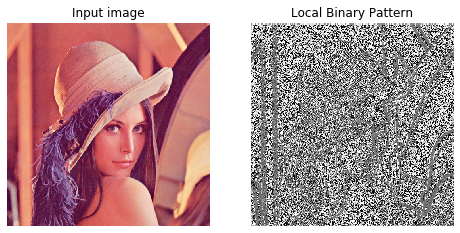

In [3]:
# LBP calculation - original image
from skimage.feature import local_binary_pattern

radius = 1
n_points = 8 * radius
METHOD = 'uniform'

lbp = local_binary_pattern(skimage.color.rgb2gray(img), n_points, radius, METHOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')


ax2.axis('off')
ax2.imshow(lbp, cmap=plt.cm.gray)
ax2.set_title('Local Binary Pattern')
plt.show()

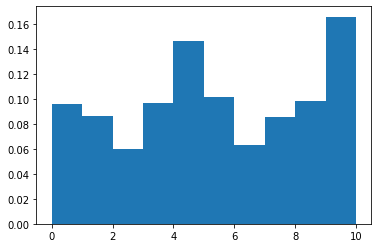

In [4]:
# Original image - histogram
n_bins = int(lbp.max() + 1)
a,b,c = plt.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins))
plt.show()

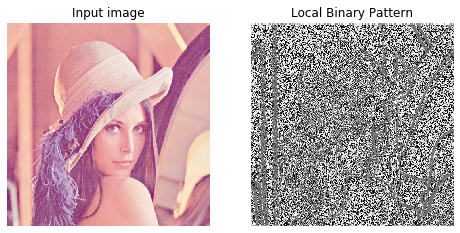

In [5]:
# Brightness change
from skimage import exposure

img_bright = exposure.adjust_gamma(img, gamma=0.5,gain=1)

lbp_bright = local_binary_pattern(skimage.color.rgb2gray(img_bright), n_points, radius, METHOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_bright)
ax1.set_title('Input image')


ax2.axis('off')
ax2.imshow(lbp_bright, cmap=plt.cm.gray)
ax2.set_title('Local Binary Pattern')
plt.show()

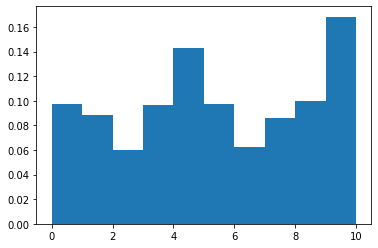

In [6]:
# Histogram for image with changed brightness
n_bins = int(lbp_bright.max() + 1)
a,b,c = plt.hist(lbp_bright.ravel(), density=True, bins=n_bins, range=(0, n_bins))
plt.show()

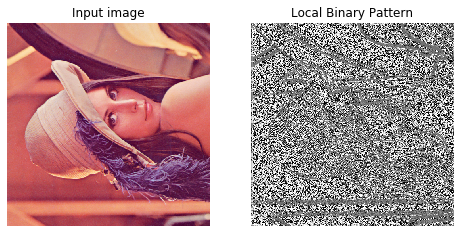

In [7]:
# Image rotation
img_rot = skimage.transform.rotate(img, angle = 90)
lbp_rot = local_binary_pattern(skimage.color.rgb2gray(img_rot), n_points, radius, METHOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_rot, cmap=plt.cm.gray)
ax1.set_title('Input image')


ax2.axis('off')
ax2.imshow(lbp_rot, cmap=plt.cm.gray)
ax2.set_title('Local Binary Pattern')
plt.show()

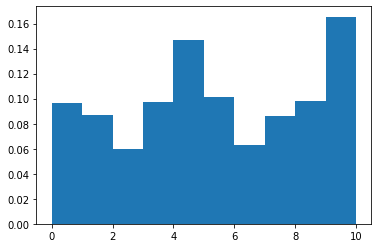

In [8]:
# Histogram for rotated image
n_bins = int(lbp_rot.max() + 1)
a,b,c = plt.hist(lbp_rot.ravel(), density=True, bins=n_bins, range=(0, n_bins))
plt.show()

Úkol - naprogramujte LBP reskriptor

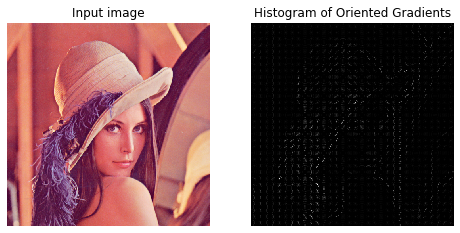

In [9]:
# HoG calculation
from skimage.feature import hog

fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

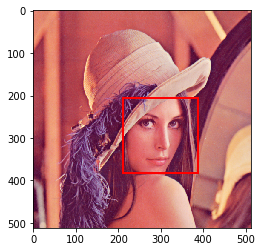

In [10]:
# Haar like based face detector
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img =  io.imread('./Lenna.png')
detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(300, 300))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')
for patch in detected:
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

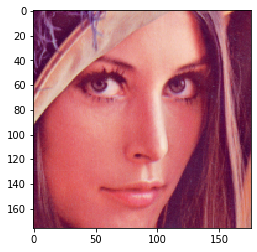

In [11]:
r = detected[0]['r']
c = detected[0]['c']
w = detected[0]['width']
h = detected[0]['height']
img_crop = np.copy(img[r:(r+w), c:(c+h)])
plt.imshow(img_crop)

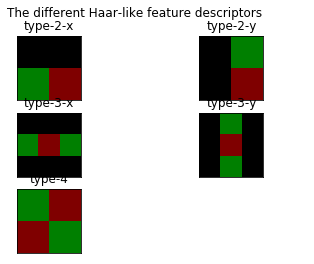

In [12]:
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
images = [np.zeros((2, 2)), np.zeros((2, 2)),
          np.zeros((3, 3)), np.zeros((3, 3)),
          np.zeros((2, 2))]

feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

fig, axs = plt.subplots(3, 2)
for ax, img, feat_t in zip(np.ravel(axs), images, feature_types):
    coord, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0,
                                          img.shape[0],
                                          img.shape[1],
                                          coord,
                                          max_n_features=1,
                                          random_state=0)
    ax.imshow(haar_feature)
    ax.set_title(feat_t)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('The different Haar-like feature descriptors')
plt.axis('off')
plt.show()

In [13]:
# Haar Cascades face detection (Viola-Jones)
import cv2

face_cascade = cv2.CascadeClassifier('C:/Python36/Lib/site-packages/opencv_data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Python36/Lib/site-packages/opencv_data/haarcascades/haarcascade_eye.xml')

img = cv2.imread('./Lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()